# Unsupervised Lab Session


## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

# Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.
## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

# 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [4]:
data = pd.read_csv(r'marketing.csv')
data.head(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [4]:
data.shape

(2240, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
data.isnull().sum()/len(data) *100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

# 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


# 5. Drop the columns which you think redundant for the analysis 

In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [3]:
data.drop(['ID','Dt_Customer'], axis=1,inplace=True)

# 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [13]:
data['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

In [12]:
data["Marital_Status"] = data["Marital_Status"].replace(["Divorced", "Widow","Alone", "YOLO",  "Absurd"], "Single")
data["Marital_Status"] = data["Marital_Status"].replace(["Married", "Together"], "relationship")

# 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [15]:
data["Total_Expenses"] = data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

In [17]:
data["Total_Expenses"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

# 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [19]:
data["Num_Total_Purchases"] = data[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases","NumDealsPurchases"]].sum(axis=1)

In [20]:
data["Num_Total_Purchases"]

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

# 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [21]:
data["Kids"] = data["Kidhome"] + data["Teenhome"]

In [22]:
data["Kids"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

# 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [23]:
data["TotalAcceptedCmp"] = data[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [24]:
data["TotalAcceptedCmp"]

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

# 11. Drop those columns which we have used above for obtaining new features

In [26]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'],
      dtype='object')

In [27]:
data.drop(['Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'], axis=1,inplace=True)

In [28]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

# 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [34]:
data['age']= 2023-data['Year_Birth']
data.drop('Year_Birth',axis=1,inplace=True)

In [36]:
data['age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: age, Length: 2240, dtype: int64

# 13. Encode the categorical variables in the dataset

In [5]:
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [6]:
cate=['Education', 'Marital_Status']
lbl_encode=LabelEncoder()
for i in cate:
    data[i]=data[[i]].apply(lbl_encode.fit_transform)

# 14. Standardize the columns, so that values are in a particular range

In [6]:
df=data.copy()
scaled_features=StandardScaler().fit_transform(df.values)
scaled_features_df=pd.DataFrame(scaled_features,index=df.index,columns=df.columns)

In [14]:
scaled_features_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.985345,-0.350141,0.251004,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,...,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846
1,-1.235733,-0.350141,0.251004,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,...,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2,-0.317643,-0.350141,1.180340,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,...,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
3,1.268149,-0.350141,1.180340,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,...,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
4,1.017761,1.428354,-0.678332,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,...,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612


In [9]:
#scaled_features_df.isnull().sum()
#scaled_features_df["Income"].fillna(value = 0,inplace = True)

# 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [15]:
cov_matrix=np.cov(scaled_features.T)
cov_matrix


array([[ 1.00044663e+00, -1.71466853e-01, -6.06069703e-02,
        -1.60148885e-01,  2.30278341e-01, -3.52268696e-01,
        -1.98799637e-02, -1.57842989e-01, -1.79252427e-02,
        -3.08861876e-02, -4.16439684e-02, -1.81407051e-02,
        -6.18457914e-02, -6.08727256e-02, -1.45104917e-01,
        -1.21328797e-01, -1.28329345e-01,  1.21193363e-01,
         6.18020701e-02, -6.05366207e-02,  7.12572266e-03,
        -5.93296539e-03, -6.54220470e-03, -3.01410006e-02,
         2.13347389e-02],
       [-1.71466853e-01,  1.00044663e+00,  7.09359926e-03,
         1.19382562e-01, -4.55846687e-02,  1.18537895e-01,
        -1.17336854e-02,  1.97663931e-01, -8.04479228e-02,
         3.36401826e-02, -1.12272706e-01, -1.05263841e-01,
        -9.55315770e-02,  3.00883137e-02,  8.19442467e-02,
         7.08136347e-02,  7.05142844e-02, -4.02988173e-02,
         5.83883041e-03,  5.32894097e-02,  3.33606497e-02,
        -1.08496219e-02,  2.13783967e-02, -5.05625191e-02,
         9.08600553e-02],
    

In [16]:
eig_vals,eig_vectors=np.linalg.eig(cov_matrix)
print('eigein values:' '\n',eig_vals)
print('\n')
print('eigein vector:' '\n',eig_vectors)

eigein values:
 [6.51476802 2.07939305 1.91658192 1.45165434 1.17296317 1.03264758
 1.00389395 0.9987328  0.94630565 0.83316649 0.19257031 0.24391671
 0.74630668 0.30249434 0.31130926 0.69361969 0.37687205 0.40745821
 0.43217002 0.46263772 0.51716532 0.53154623 0.63692524 0.60971165
 0.58563627]


eigein vector:
 [[-5.73312639e-02  3.44311005e-01 -9.68725498e-02  2.79733394e-01
  -2.66749578e-01 -2.95346053e-01  6.34726216e-02 -3.98547230e-02
   2.59193926e-01 -3.79587550e-01 -1.47379077e-02  2.86937632e-02
  -2.72108425e-02  3.27171271e-02  7.15477505e-04  3.71884811e-01
  -1.05287640e-01  1.13462800e-01  8.15185246e-02  1.09891921e-01
   4.47664726e-01 -3.82977801e-02 -1.70091130e-01  1.69220300e-02
  -1.84179083e-02]
 [ 1.97030389e-02 -2.39865441e-01 -1.23749309e-01 -2.64482612e-01
   4.68290971e-01 -2.13228998e-01  2.09508806e-01 -1.65814468e-01
   3.92533769e-01 -2.29735751e-01  7.06317861e-02 -4.67397787e-02
  -4.59326647e-02 -4.27313422e-02 -8.42967005e-02 -3.02276344e-01
  -5.6

In [17]:
total=sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [26.058606521982526, 8.31742360930892, 7.666190708683078, 5.806513610549157, 4.6917688677880545, 4.130516510408193, 4.01550404895853, 3.9948598266977933, 3.7851549693895272, 3.33260641342707, 2.9851733949329415, 2.7744292102345542, 2.5476554383863084, 2.438803016753833, 2.342503225222758, 2.1261469244637197, 2.068624305776465, 1.8505178244096592, 1.728649177595861, 1.6298037076615917, 1.5074612527604856, 1.2452147917958738, 1.2099557451551615, 0.9756494143914671, 0.7702674832664621]
Cummulative Variance Explained:  [ 26.05860652  34.37603013  42.04222084  47.84873445  52.54050332
  56.67101983  60.68652388  64.6813837   68.46653867  71.79914509
  74.78431848  77.55874769  80.10640313  82.54520615  84.88770937
  87.0138563   89.0824806   90.93299843  92.6616476   94.29145131
  95.79891257  97.04412736  98.2540831   99.22973252 100.        ]


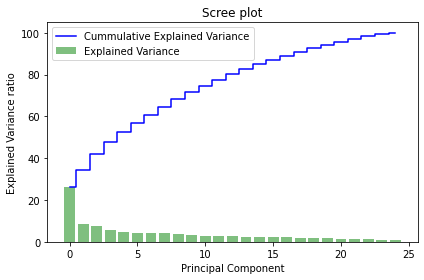

In [22]:
plt.bar(range(0,len(var_exp)),var_exp,align='center',alpha=0.5,color='green',label='Explained Variance')
plt.step(range(0,len(cum_var_exp)),cum_var_exp,where='mid',color='blue',label='Cummulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [24]:
#using the dimension obtained from PCA to apply Clustering
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.762554,-0.298068,-0.408819,1.935039,-0.510390,0.371647,-0.629800,-0.346300
1,-2.374811,0.186878,-0.236034,-1.015781,-0.565237,0.461549,-0.496444,0.230644
2,1.621652,-0.172977,-1.114742,-0.236553,-0.118784,-0.068338,-1.489770,0.280245
3,-2.503633,-1.443086,0.203120,0.070066,0.257939,-0.359067,-1.334570,-0.020934
4,-0.436426,0.019308,-0.465952,0.319934,0.606440,-0.977681,1.608603,-0.873978


In [26]:
#finding optimal K value by KMeans clustering using Elbow plot
from sklearn.cluster import KMeans
cluster_errors=[]
cluster_range=range(2,15)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

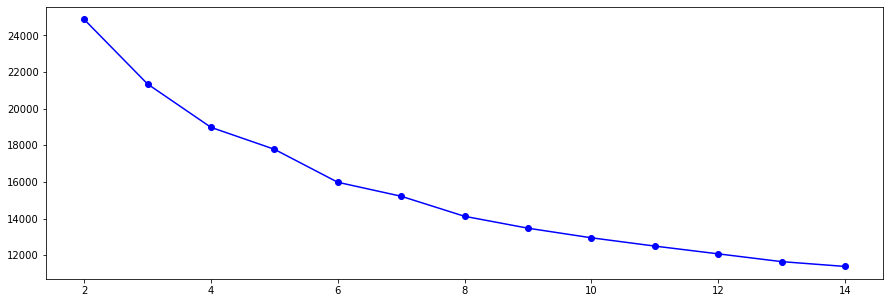

In [27]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

#Elbow Plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [29]:
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [31]:
#Creating a dataframe of label
label=pd.DataFrame(kmeans.labels_,columns=['Label'])
kmeans_df=pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,3.762554,-0.298068,-0.408819,1.935039,-0.510390,0.371647,-0.629800,-0.346300,2
1,-2.374811,0.186878,-0.236034,-1.015781,-0.565237,0.461549,-0.496444,0.230644,1
2,1.621652,-0.172977,-1.114742,-0.236553,-0.118784,-0.068338,-1.489770,0.280245,0
3,-2.503633,-1.443086,0.203120,0.070066,0.257939,-0.359067,-1.334570,-0.020934,1
4,-0.436426,0.019308,-0.465952,0.319934,0.606440,-0.977681,1.608603,-0.873978,0


C:\Users\Rojalin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


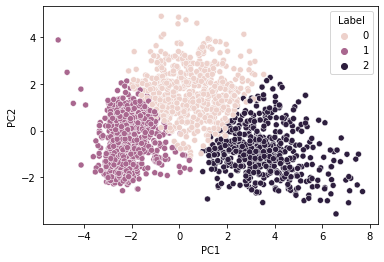

In [32]:
#visualizing the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

# 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [ ]:
#Agglomerative clustering using Original Data
import scipy.cluster.hierarchy as shc
plt.figure(figsize=[18,5])
merg =shc.linkage(scaled_features,method='ward')
Dendrogram=shc.dendrogram(merg,leaf_rotation=90,)
#plt.xlabel('Datapoints')
#plt.ylabel('Euclidean Distance')
#plt.show()

In [33]:

from sklearn.cluster import AgglomerativeClustering

In [36]:
from sklearn.metrics import silhouette_score
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters = i)
    hier=hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.2543580887043282
3 0.12875016203768658
4 0.14099968907083946
5 0.15229877242511125
6 0.16144355862857382
7 0.1765218918067559
8 0.18199013507587605
9 0.18122216417217046
10 0.10268622646929246
11 0.10196747169007117
12 0.10432540597287246
13 0.10834015369043475
14 0.11296019582389785


In [37]:
#Building a hierarical Cluster using the optimal cluster as 2
hie_cluster = AgglomerativeClustering(n_clusters = 2,affinity='euclidean',linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [38]:
df_label=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label.head(5)

,Labels
0,1
1,0
2,1
3,0
4,0
